# **Projeto Final Python - Analise de dados de clientes adimplentes x inadimplentes**

# **Introdução ao problema proposto**

Esse notebook consiste em uma análise de dados com objetivo de concluir o projeto final de Python do curso Cientista de Dados ofertado pela E.B.A.C. Inicialmente vamos importar o arquivo CSV contendo os dados de crédito de clientes de uma instituição que serão utilizados para analisar a razão entre os clientes adimplentes e inadimplentes e quais fatores esses clientes tem em comum para definir esse status. O status de adimplência e inadimplência estão definidos pela **coluna ="Default"** sendo "0" para os clientes adimplentes e "1" para os clientes inadimplentes. Caso necessário realizarei métodos de limpeza e transformação de dados para uma análise mais clara e acertiva.

# **Bibliotecas utilizadas**

Importando as blibliotecas que serão utilizadas:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Carregando o arquivo e exploração dos dados**

O arquivo csv contendo os dados foi feito o upload no Kaggle e possui o seguinte caminho: "/kaggle/input/dados-projeto/Python_M10_support material.csv". Para dar sequência vamos trazer esses dados utilizando a biblioteca pandas.

In [2]:

df= pd.read_csv('/kaggle/input/dados-projeto/Python_M10_support material.csv', na_values = 'na')

df.head(n=5) #Exibe as 5 primeiras linhas do arquivo.csv



,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [3]:
df.shape # Retorna o numero de linhas e colunas do arquivo CSV
total,_ = df.shape # Armazena o valor total na variavel total
total_adimplentes,_ = df[df['default']== 0].shape #Filtra todos os casos com default = 0 e armazena na variavel total_adimplentes
total_inadimplentes,_ = df[df['default']==1].shape #Filtra todos os casos com default = 1 e armazena na variavel total_inadimplentes

propor_adimplente = round(100 * total_adimplentes / total, 2)
propor_inadimplente = round(100 * total_inadimplentes / total, 2)

print(f'O total de clientes é: {total}')
print(f'O total de clientes adimplentes é:{total_adimplentes}'+ f' e representa {propor_adimplente}% do total')
print(f'O total de clientes inadimplentes é:{total_inadimplentes}'+ f' e representa {propor_inadimplente}% o total') 

O total de clientes é: 10127
O total de clientes adimplentes é:8500 e representa 83.93% do total
O total de clientes inadimplentes é:1627 e representa 16.07% o total


Devemos verificar os tipos dos dados de cada coluna, caso algum esteja no formato errado será necessário a correção.

In [4]:
df.dtypes #Verifica os tipos dos dados

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [5]:
df.select_dtypes('object').describe().transpose() #Filtra apenas as colunas do tipo 'object'

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [6]:
df.drop('id', axis =1).select_dtypes('number').describe().transpose() #Retira a primeira coluna 'id' e retorna as colunas do tipo 'number'

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Com as informações extraidas do arquivo, é chegada a hora de realizar as transformações e limpezas.
Analisando o Schema, as colunas "limite_credito" e "valor_transacoes,12m" deveriam ser do tipo "number", então será necessario realizar essa transformação.

In [7]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes #Mostra o tipo dessas duas colunas

limite_credito          object
valor_transacoes_12m    object
dtype: object

# **Limpeza e transformação dos dados**

Criação de uma função lambda para corrigir o padrao de escrita da string substituindo pontos(".") por espaços vazios("") e virgulas(",") por pontos("."). Afim de converter dtype 'object'em 'float64'.

In [8]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22'] #Testando se a funcao está funcionando corretamente
valores_limpos = list(map(fn, valores_originais))
print(valores_originais)
print(valores_limpos)
print(type(valores_limpos[1]))

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]
<class 'float'>


Após verificada a função, basta aplicar sobre as colunas alvo.

In [9]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Verificando novamente os tipos das colunas alvo.

In [10]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [11]:
df.drop('id', axis =1).select_dtypes('number').describe().transpose() #Retira a primeira coluna 'id' e retorna as colunas do tipo 'number'

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


O proximo procedimento será analisar quais colunas estão afetadas pelos dados faltantes.  

In [12]:
df.isna().any() #Verifica entre as linhas, as colunas preenchidas com 'na'

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

A função a seguir, irá retirar algumas estatisticas das colunas com dados faltantes (escolaridade, estado_civil e salario_anual)

In [13]:
def estatistica_dados_faltantes(df: pd.DataFrame) -> None:

  estatistica_dados_faltantes = []
  for coluna in df.columns:
    if df[coluna].isna().any():
      qtd, _ = df[df[coluna].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {coluna: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      estatistica_dados_faltantes.append(dict_dados_faltantes)

  for stat in estatistica_dados_faltantes:
    print(stat)

In [14]:
estatistica_dados_faltantes(df=df) #levanta os dados faltantes sobre o total

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [15]:
estatistica_dados_faltantes(df=df[df['default']==0]) #levanta os dados faltantes sobre os clientes adimplentes (Default = 0)

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [16]:
estatistica_dados_faltantes(df=df[df['default']==1]) #levanta os dados faltantes sobre os clientes inadimplentes (Default = 1)

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Realizar a limpeza, retirando as colunas com dados faltantes.

In [17]:
df.dropna(inplace=True)
df.shape 
total_new,_ = df.shape # 
total_adimplentes_new,_ = df[df['default']== 0].shape 
total_inadimplentes_new,_ = df[df['default']==1].shape 

propor_adimplente_new = round(100 * total_adimplentes_new / total_new, 2)
propor_inadimplente_new = round(100 * total_inadimplentes_new / total_new, 2)
print(f'O total de clientes é: {total_new}')
print(f'O total de clientes adimplentes é:{total_adimplentes_new}'+ f' e representa {propor_adimplente_new}% do total')
print(f'O total de clientes inadimplentes é:{total_inadimplentes_new}'+ f' e representa {propor_inadimplente_new}% o total')

O total de clientes é: 7081
O total de clientes adimplentes é:5968 e representa 84.28% do total
O total de clientes inadimplentes é:1113 e representa 15.72% o total


Fazendo uma comparação entre os dados antigos com os novos dados após a remoção de dados faltantes.

In [18]:
print(f'Total de cliente antigo {total}'+ f' \nTotal de clientes novo: {total_new}'+ f' \nDiferença = {total-total_new}')


Total de cliente antigo 10127 
Total de clientes novo: 7081 
Diferença = 3046


In [19]:
print(f'A proporção anterior de adiplentes ativos era de: {propor_adimplente}% \nA nova proporção de adimplentes é: {propor_adimplente_new}%')

A proporção anterior de adiplentes ativos era de: 83.93% 
A nova proporção de adimplentes é: 84.28%


In [20]:
print(f'A proporção anterior de inadiplentes ativos era de: {propor_inadimplente}% \nA nova proporção de adimplentes é: {propor_inadimplente_new}%')

A proporção anterior de inadiplentes ativos era de: 16.07% 
A nova proporção de adimplentes é: 15.72%


Após a limpezada dos dados faltantes, é possivel perceber que as proporções de adimplentes e inadimplentes praticamente não sofreram alterações. Sendo assim, Os dados estão prontos para visualização e análise.

# **Análise dos dados com visualição de gráficos**

In [21]:
sns.set_style("whitegrid") #Definindo um grid light
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

Vamos analisar primeiro os atributos caregóricos como: escolaridade, tipo_cartao, salario_anual.

# **Escolaridade**

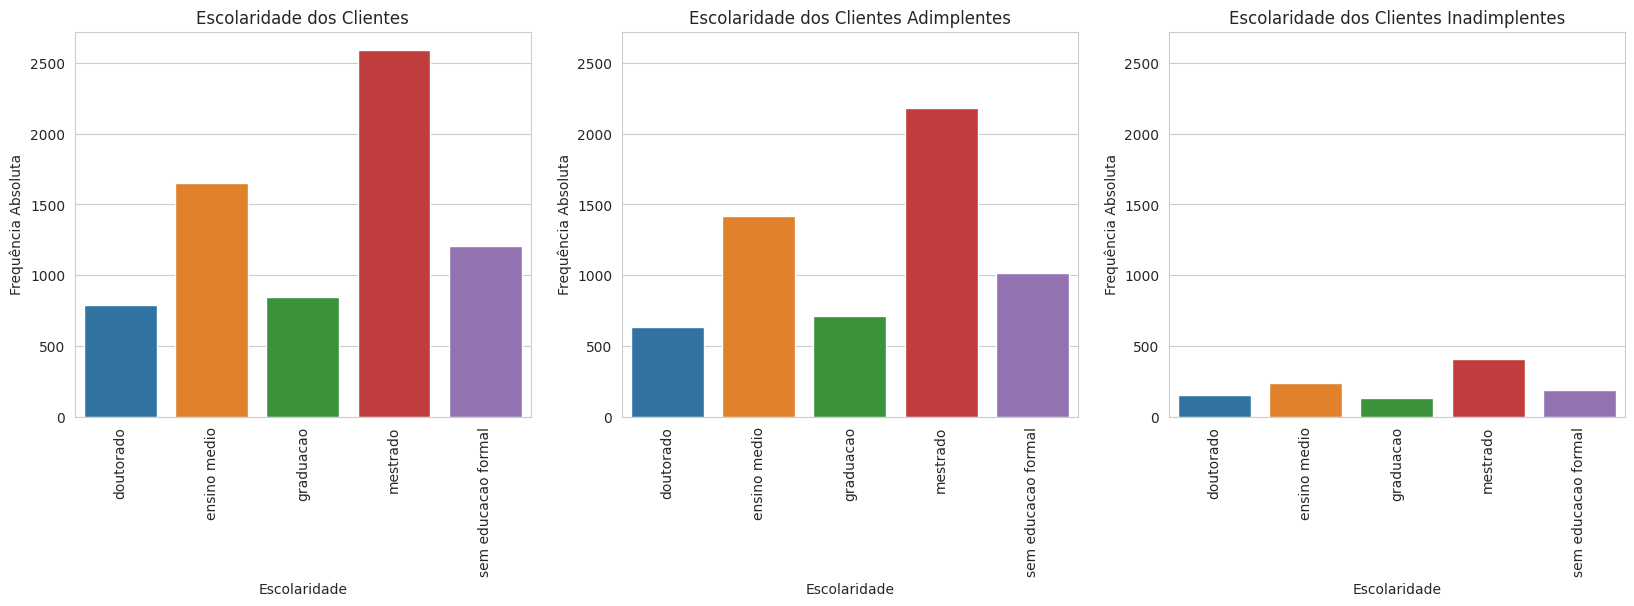

In [22]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().reset_index()  # Cria um novo DataFrame com as contagens
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

figura.show()

Analisando os resultados pela escolaridade dos clientes não foi possivel chegar a uma determinada classe que resultaria em um impacto para definir se o cliente terá mais possibildiade de ser tornar adimplente ou inadimplente.

# **Tipo de Cartão dos Clientes**

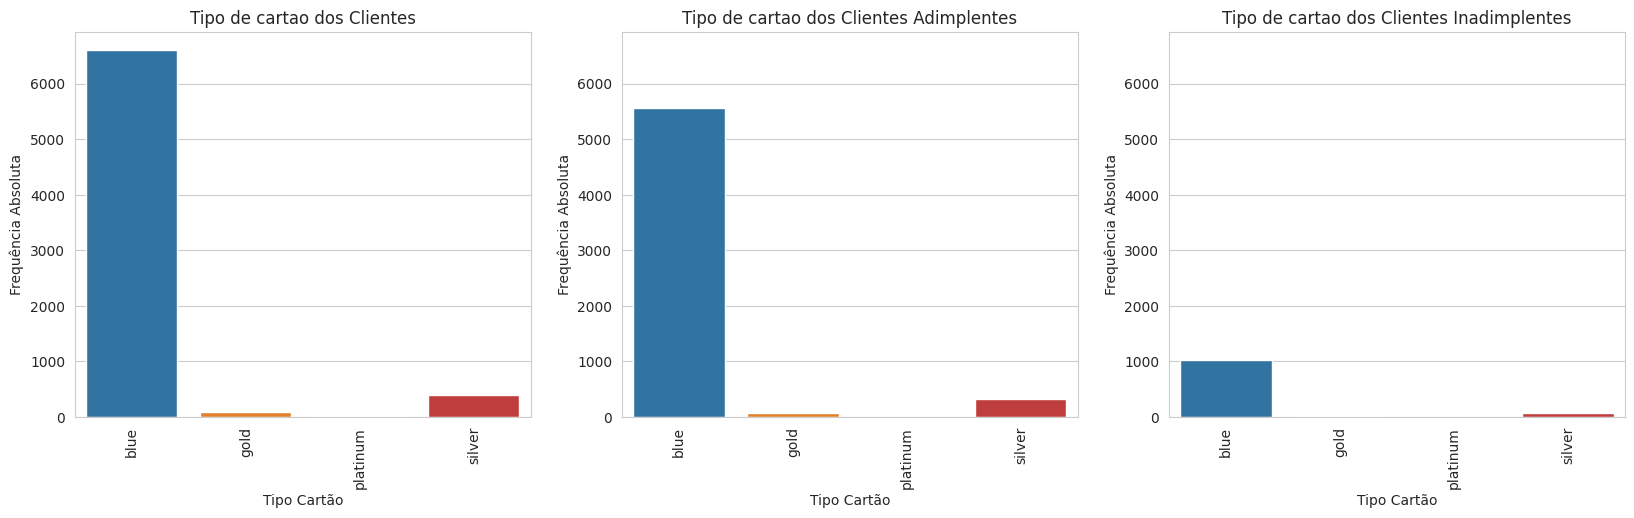

In [23]:
coluna = 'tipo_cartao'
titulos = ['Tipo de cartao dos Clientes', 'Tipo de cartao dos Clientes Adimplentes', 'Tipo de cartao dos Clientes Inadimplentes']
eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:

    df_to_plot = dataframe[coluna].value_counts().reset_index()  # Cria um novo DataFrame com as contagens
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)
    f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel='Tipo Cartão', ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

figura.show()

Analisando os resultados do tipo de cartão dos clientes foi possivel detectar que as pessoas que possuem cartao do tipo "gold" tem maior propabilidade de permanecerem adimplentes. Porem em relaçao aos outros tipos de cartões não foi possivel definir uma pré-disposição.

# **Salário anual**

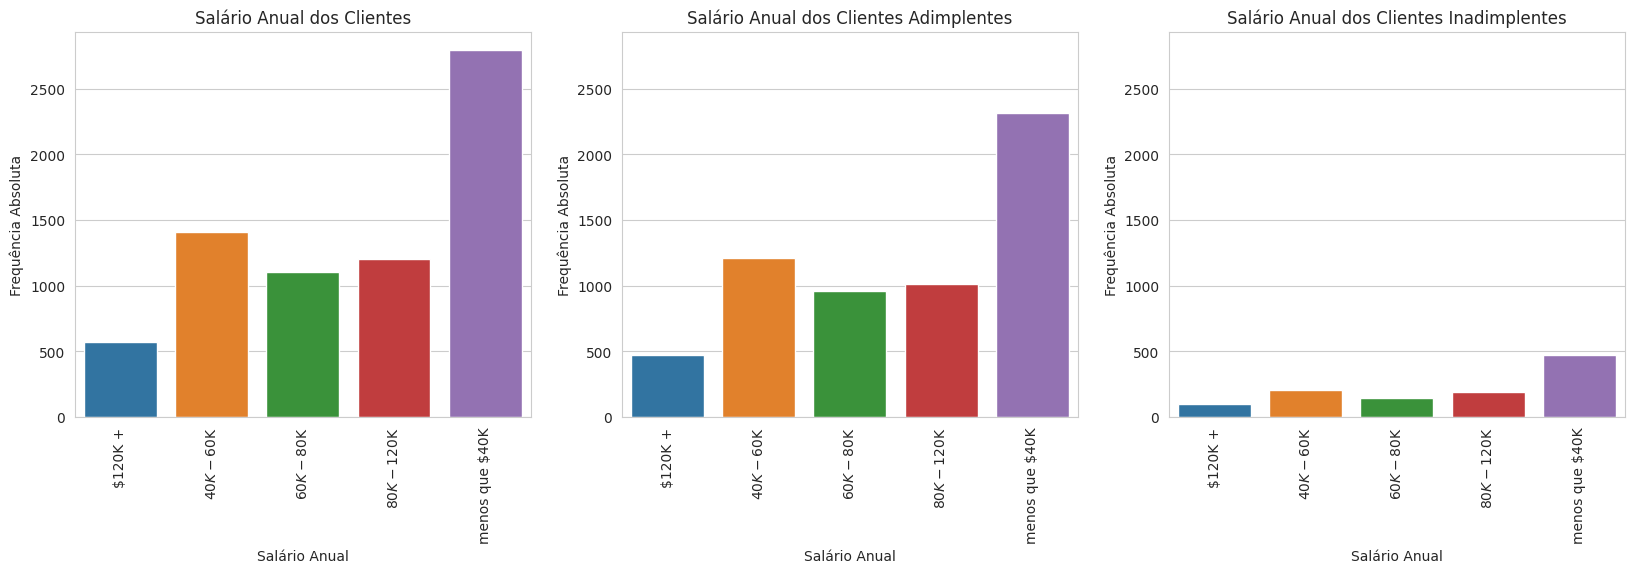

In [24]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)


  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel='Salário Anual', ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Analisando os resultados referente ao salario anual dos clientes não foi possivel chegar a uma determinada faixa salarial que define a situação de inadimplência do cliente.


Agora analisando os atributos numéricos.

# **Quantidade de transações durante 12 meses**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


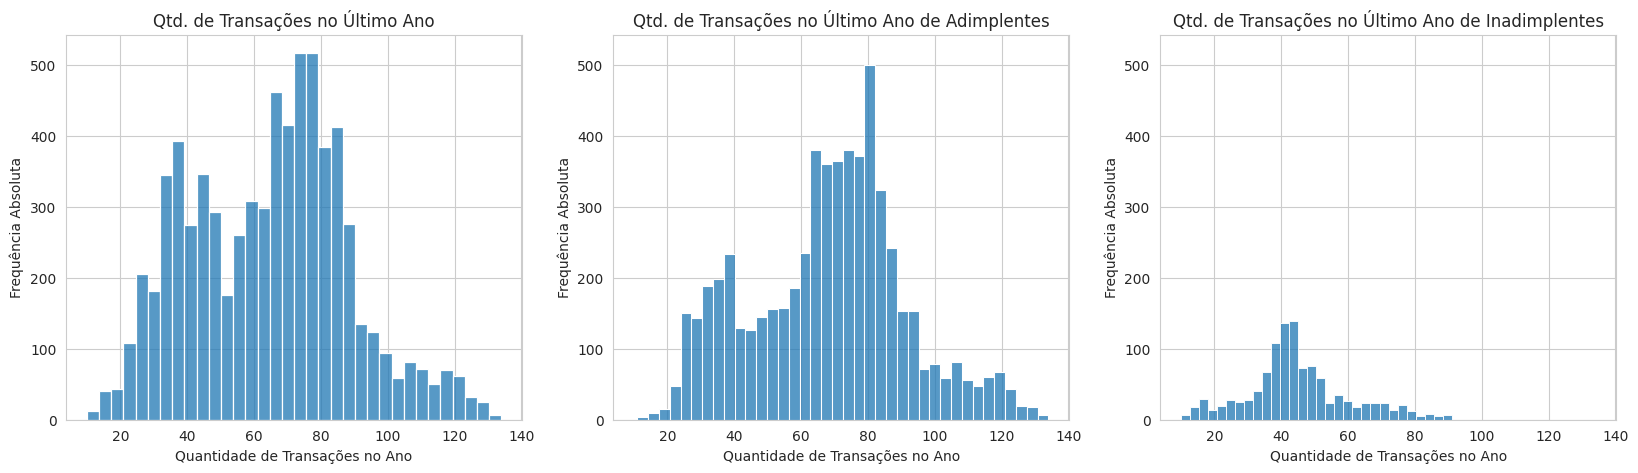

In [25]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel='Quantidade de Transações no Ano', ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Pela disposição dos dados no gráfico, é possivel observar que a maior parte dos clientes inadimplentes fazem em media 40 transações anuais. Já os clientes adimplentes fazem maiores números de transações anuais.

# **Limite de crédito**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


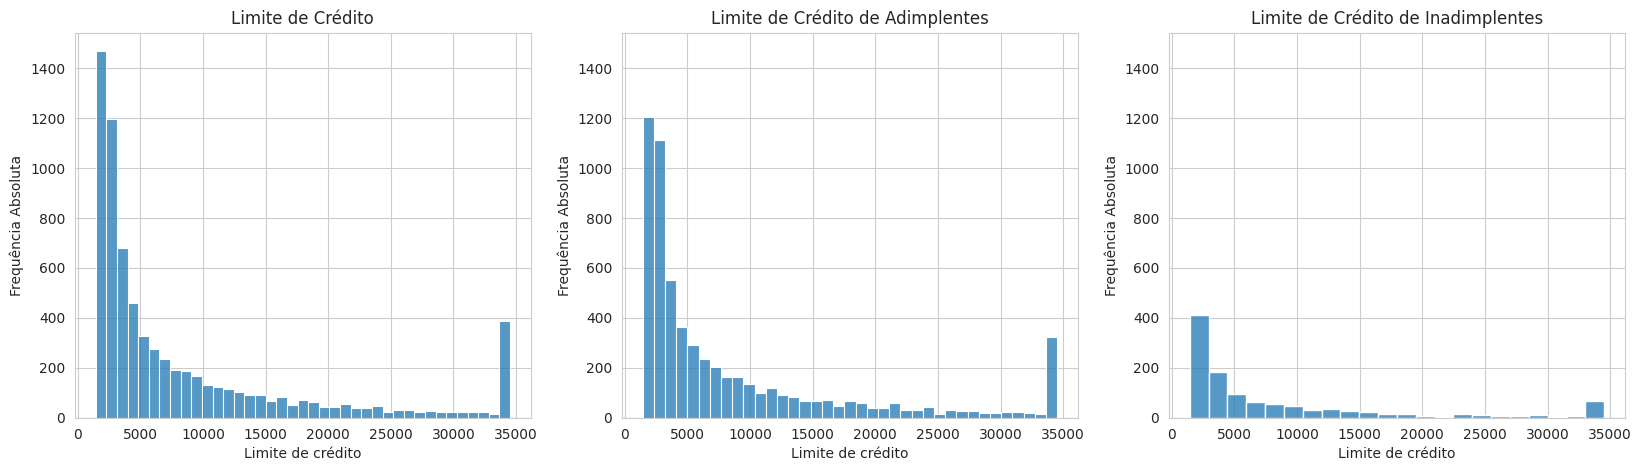

In [26]:
coluna = 'limite_credito'
titulos = ['Limite de Crédito', 'Limite de Crédito de Adimplentes', 'Limite de Crédito de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel="Limite de crédito", ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Através do limite de crédito não é possível determinar nenhuma faixa de limite de crédito que seja tendenciosa a tornar um cliente adimplente ou inadimplente.

# **Valor das Transações em 12 meses**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


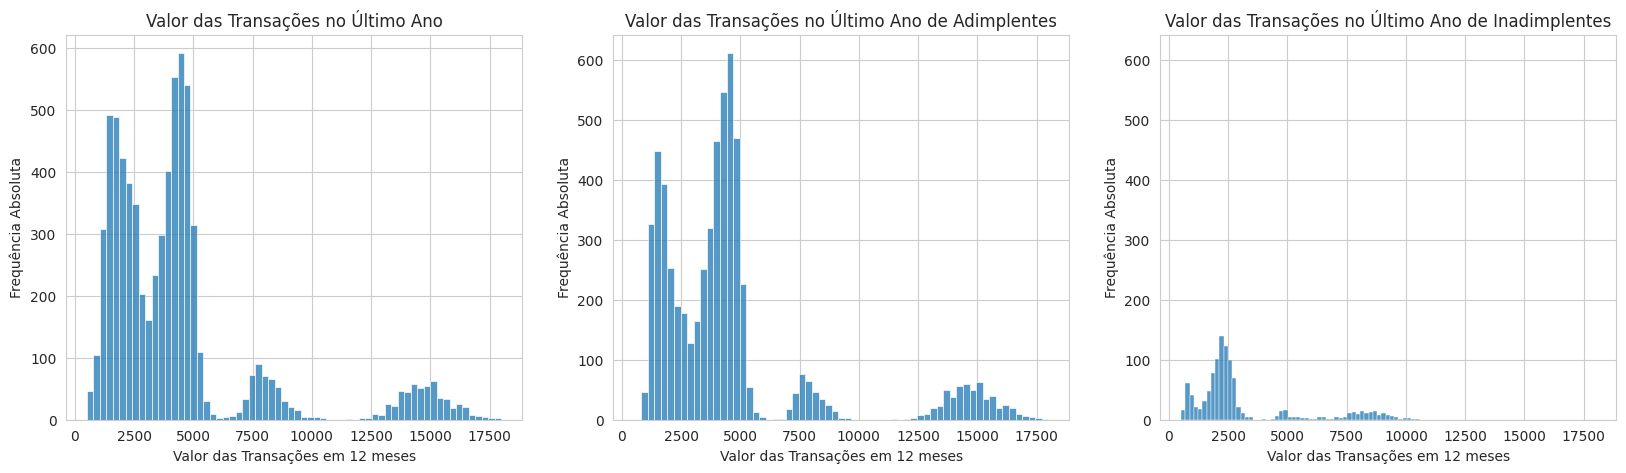

In [27]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel="Valor das Transações em 12 meses", ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Com a analise do valor das transações anuais, é possivel percerber que os clientes que fazem transações com valores baixos tendem a se tornar inadimplentes. Já os com as transações de maior valor(>10000) não apresentam casos de inadimplência. 

# # **Conclusão**

Após a análise dos dados, tento em vista o objetivo de determinar os fatores para um cliente se classificar como adimplente ou inadimplente, temos que os clientes que utilziam do cartão tipo "GOLD", fazem um volume maior de transações no ano e as transações são de valores altos(maiores que 10000) dentro de 12 meses, tem a maior probalidade de se manterem adimplentes. Já os clientes com poucas transações e com transações de valores baixos, tem a maior possibilidade de se tornarem inadimplentes. Alguns atributos analisados não apresentam variação suficiente para chegar a uma conclusão.